In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [317]:
#ler o arquivo

arquivo = "two_squares_data.csv"
arquivo_result = "result_two_squares.txt"

#arquivo = "two_moon_data.csv"
#arquivo_result = "result_two_moon.txt"

#arquivo = "two_squares_overlapping_data.csv"
#arquivo_result = "result_two_squares_overlapping.txt"

data = pd.read_csv(arquivo, names=['c1', 'c2', 'rotulos'])

In [318]:
data.count()

c1         200
c2         200
rotulos    200
dtype: int64

In [319]:
data.info()

<Axes: xlabel='c1', ylabel='c2'>

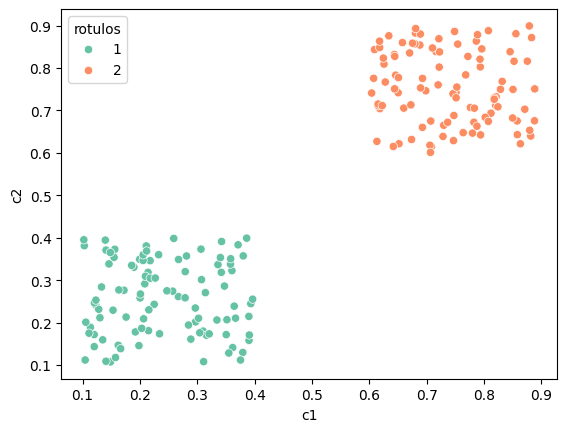

In [320]:
#plotar dispersao
sns.scatterplot(data=data, x='c1', y='c2', hue='rotulos', palette='Set2')

In [321]:
X = data.drop('rotulos', axis=1) # matriz das caracteristicas
y = data['rotulos']              # vetor de rotulos

#separando treino e test da mesma forma para todos os classificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)


# MLP


In [322]:
#Modelo MLP
model = MLPClassifier(hidden_layer_sizes=(100, 5), max_iter=1000)  # Defina o número de camadas e neurônios conforme necessário
model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 5), max_iter=1000)

In [323]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [324]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

In [325]:
# Abra o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecione a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo MLP:")
    print("Matriz de Confusão:\n", cm)
    print("Acurácia:", accuracy)
    print("Sensibilidade (Recall):", sensibilidade)
    print("Especificidade:", especificidade)

# Restaure a saída padrão para seu estado original
sys.stdout = sys.__stdout__

print("Resultados salvos em", nome_arquivo)

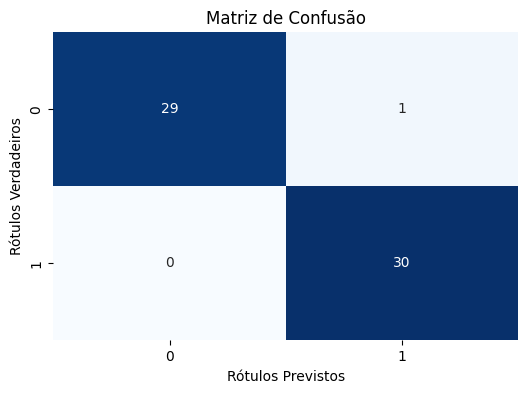

In [326]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# Naive Bayes

In [327]:
# Modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [328]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [329]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

In [330]:
# Abra o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecione a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo Naive Bayes:")
    print("Matriz de Confusão:\n", cm)
    print("Acurácia:", accuracy)
    print("Sensibilidade (Recall):", sensibilidade)
    print("Especificidade:", especificidade)

# Restaure a saída padrão para seu estado original
sys.stdout = sys.__stdout__

print("Resultados salvos em", nome_arquivo)

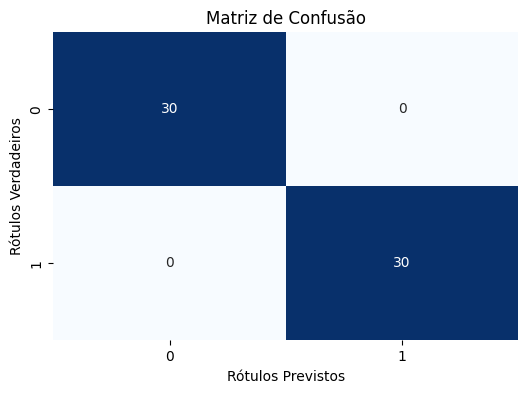

In [331]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM Linear

In [332]:
# Modelo SVM com kernel Linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


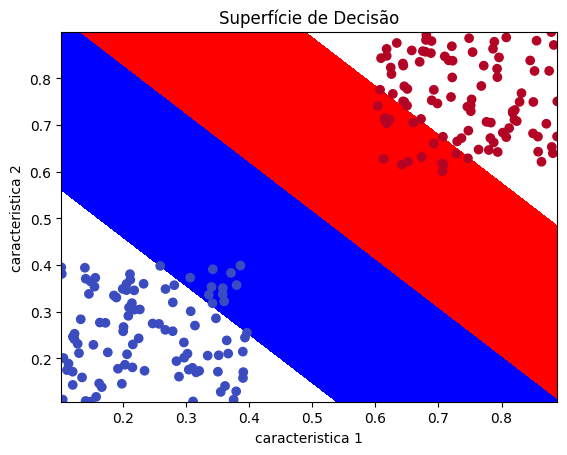

In [333]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [334]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [335]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

In [336]:
# Abra o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecione a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo SVM linear:")
    print("Matriz de Confusão:\n", cm)
    print("Acurácia:", accuracy)
    print("Sensibilidade (Recall):", sensibilidade)
    print("Especificidade:", especificidade)

# Restaure a saída padrão para seu estado original
sys.stdout = sys.__stdout__

print("Resultados salvos em", nome_arquivo)

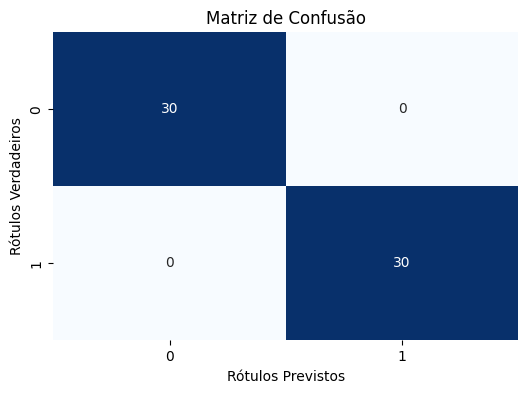

In [337]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM Polinomial

In [338]:
# Modelo SVC kernel polinomial
model = SVC(kernel='poly', degree=3)  # O grau (degree) define a ordem do kernel polinomial, vai depender do dataset
model.fit(X_train, y_train)

SVC(kernel='poly')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


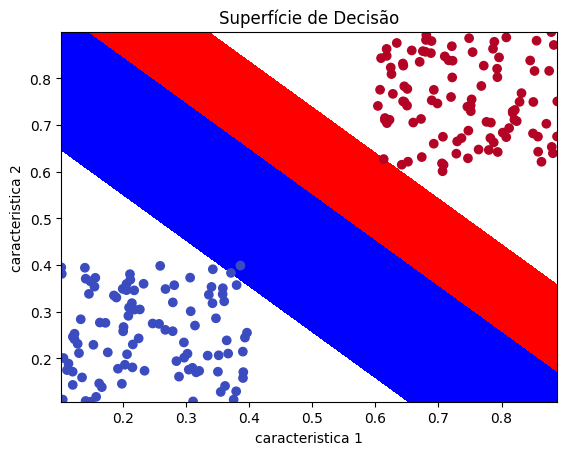

In [339]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [340]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [341]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

In [342]:
# Abra o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecione a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo SVM polinomial:")
    print("Matriz de Confusão:\n", cm)
    print("Acurácia:", accuracy)
    print("Sensibilidade (Recall):", sensibilidade)
    print("Especificidade:", especificidade)

# Restaure a saída padrão para seu estado original
sys.stdout = sys.__stdout__

print("Resultados salvos em", nome_arquivo)

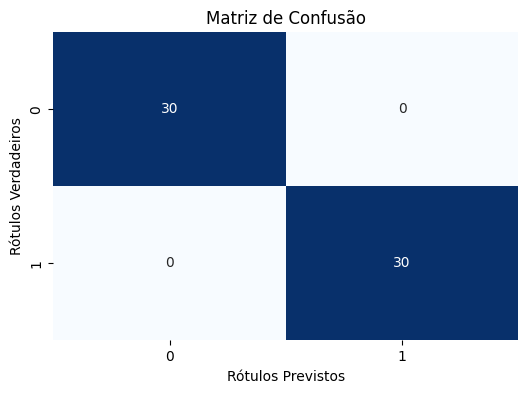

In [343]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM RBF

In [344]:
# SVM com kernel RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Você pode ajustar os hiperparâmetros C e gamma conforme necessário
model.fit(X_train, y_train)

SVC()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


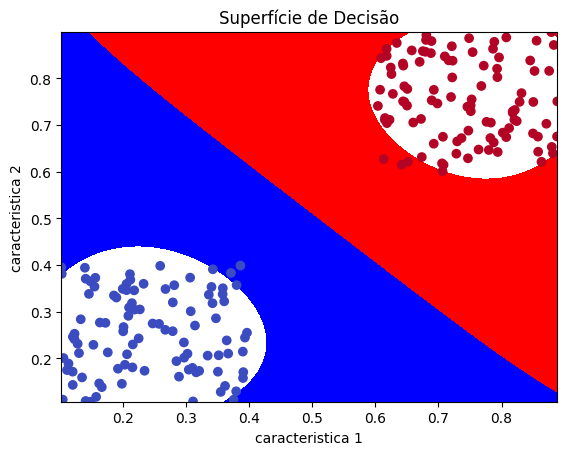

In [345]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [346]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [347]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

In [348]:
# Abrir o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecionar a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo SVM RBF:")
    print("Matriz de Confusão:\n", cm)
    print("Acurácia:", accuracy)
    print("Sensibilidade (Recall):", sensibilidade)
    print("Especificidade:", especificidade)

# Restauraçao da saída padrão para seu estado original
sys.stdout = sys.__stdout__

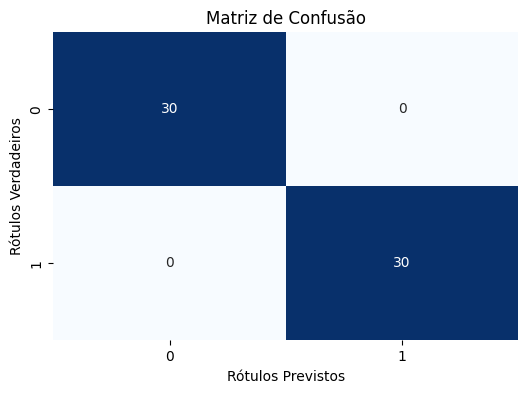

In [349]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()